# Homework 3 - SVM and Regularization
## CSCI 5622 - Spring 2019
***
**Name**: Jacob Tiede
***

This assignment is due on Canvas by **11.59 PM on Monday, March 16**. Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. Your solutions to analysis questions should be done in Markdown directly below the associated question.  Remember that you are encouraged to discuss the problems with your classmates and instructors, but **you must write all code and solutions on your own**, and list any people or sources consulted.

Portions of this assignment, including the plotting functions used, are implemented from Andrew Ng's Machine Learning course.

## Part 1: Lasso and Ridge regression - 40 points

We have seen that the difference between LASSO and Ridge regression is due to their different regularization model (L1 norm vs. L2 norm). The regularization term in LASSO is $\lambda||\mathbf w||_1$, while the regularization term in ridge regression is  $(\lambda/2) ||\mathbf w||^2$ (where $\mathbf w$ denotes the set of parameters for the linear regression model and $\lambda$ is the trade-off regularization parameter). LASSO typically enforces more _sparsity_ on the resulting $\mathbf w$. That is, the resulting classifier will have a small number of non-zero weights. In this exercise, you'll explore differences in performance between LASSO and Ridge regression algorithms across a few different data sets.

You will be using the following data sets:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
class DataA:
    def __init__(self):
        f = lambda x, y : np.random.randn(x, y)
        self.train_x = f(1000, 20)
        self.train_y = f(1000, 1)[:,0]
        self.test_x = f(500, 20)
        self.test_y = f(500, 1)[:,0]
        
class DataB:
    def __init__(self):
        # Data from: https://archive.ics.uci.edu/ml/datasets/Cloud
        data = np.fromfile("data/cloud.data", sep = " ").reshape((1024, 10))
        y = data[:, 6]
        X = np.delete(data, 6, axis = 1)
        
        self.train_x = X[:800]
        self.train_y = y[:800]
        
        self.test_x = X[800:]
        self.test_y = y[800:]
        
class DataC:
    def __init__(self):
        # Data from: http://archive.ics.uci.edu/ml/datasets/Forest+Fires
        data = pd.read_csv("data/forestfires.csv")
        data = data.sample(frac = 1).reset_index(drop = True).drop(columns = ["month", "day"])
        data["area"] = np.log(data["area"] + 1)
        X = data.drop(columns = "area").values
        y = data["area"].values
        
        self.train_x = X[:400]
        self.train_y = y[:400]
        
        self.test_x = X[400:]
        self.test_y = y[400:]

In [2]:
data_a = DataA()
data_b = DataB()
data_c = DataC()

1. [15 Pts] Fit a regressor to the data set using sklearn's `Lasso` module (for more details, read [here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)):
    1. Train a LASSO model for each of the 3 data sets(A, B and C) using 5 different values for the regularization parameter $\lambda$. Use $\lambda = 0.01, 0.05, 0.1, 0.2, 0.3$. Report and plot the number of non-zero coefficients.
    2. Report the value of $\lambda$ that yields the minimum number of non-zero coefficients in the resulting $\mathbf w$ in case of each dataset, and report the number of non-zero coefficients in that case. Keep track of this $\mathbf w$, we will refer to it as $\mathbf w_b$. [This step is only needed if any $\mathbf{w}$ has coefficients that are 0.]
    3. For each of the classifiers learned in part (A), compute their test error as mean-squared-error. Plot the test error as function of $\lambda$ for all three datasets in the same graph.
    4. Report the value of $\lambda$ that yields the $\mathbf w$ with the minimum test error in case of each dataset. Save this $\mathbf w$ as $\mathbf w_d$. How many non-zero coordinates does $\mathbf w_d$ have? Keep track of this, as well as the answers for $\mathbf w_b$ for the comparison to Ridge Regression below. It might be helpful to make a table, i.e. the number of non-zero coordinates and the test error for $\mathbf w_b$ and $\mathbf w_d$ for each data set.
    5. For data set A, by increasing the value of $\lambda$, can you get most of the entries to be 0? Can you get every entry to be 0?
    
Note: $\lambda$ is same as $\alpha$ in the sklearn module.

------------------- PART (A)---------------------------
Lambda Value:
[0.01, 0.05, 0.1, 0.2, 0.3]
Number of non-zero coefficients for data set A
[15, 1, 0, 0, 0]
Lambda Value:
[0.01, 0.05, 0.1, 0.2, 0.3]
Number of non-zero coefficients for data set B
[9, 7, 7, 7, 6]
Lambda Value:
[0.01, 0.05, 0.1, 0.2, 0.3]
Number of non-zero coefficients for data set C
[9, 7, 6, 6, 4]


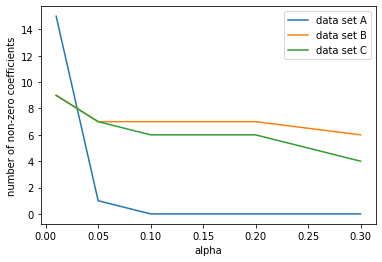

------------------- PART (B)---------------------------
The value of alpha that minimizes the number of non-zero coefficients in data set A is:
0.1
The value of alpha that minimizes the number of non-zero coefficients in data set B is:
0.3
The value of alpha that minimizes the number of non-zero coefficients in data set C is:
0.3
------------------- PART (C)---------------------------


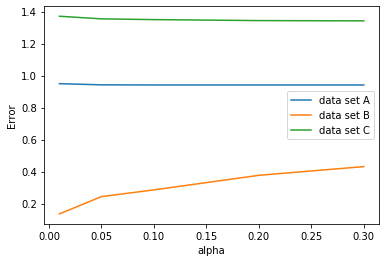

------------------- PART (D)---------------------------
The lambda that minimizes the mean squared error of data set A is:
0.1
The lambda that minimizes the mean squared error of data set B is:
0.01
The lambda that minimizes the mean squared error of data set C is:
0.3
------------------- PART (E)---------------------------
We can see that, for data set A, there is a value of lambda that will give zero non-zero coefficients in the end model. From the graph in part a we can see that one such lambda is .15


In [3]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from matplotlib.pylab import plt
import math

class Lasso:
    def __init__(self, gamma, data):
        self.gamma = gamma
        self.data = data
        
        
    def fit(self):
        '''
        Here you must fit a Lasso model, train it using the data you have in self.data, 
        specifically the training part, for the specified value of gamma in self.gamma. 
        Calculate the number of non-zero coefficients in the model weights. Then,
        test the trained model on the testing part of the data in self.data and calculate the
        Root mean square error between the predicted values and the actual values of target variable.
        
        RETURN : 
            num_nonzero_coeff : number of non-zero coefficients in the model weights
            mean_squared_err : Root mean square error between the predicted values and the 
            actual values of target variable
        '''
        #make the model with alpha = gamma
        model = linear_model.Lasso(alpha = self.gamma)
        #fit the linear regression
        model.fit(self.data.train_x, self.data.train_y)
        #count number of non-zero coefficients
        num_nonzero_coeff = 0
        for i in model.coef_:
            if(i != 0):
                num_nonzero_coeff += 1
        #get the root mean square error
        predictedY = model.predict(self.data.test_x)
        mean_squared_err = np.sqrt(mean_squared_error(self.data.test_y, predictedY))
        self.model = model
        return(num_nonzero_coeff, mean_squared_err)
            



data_sets = {'A': data_a, 'B': data_b, 'C': data_c}
alphas = [0.01, 0.05, 0.1, 0.2, 0.3]

print('------------------- PART (A)---------------------------')
for i in data_sets.keys():
    numberNonZer = []
    for j in alphas:
        LassoModel = Lasso(j, data_sets[i])
        numberNonZer.append(LassoModel.fit()[0])
    print("Lambda Value:")
    print(alphas)
    print("Number of non-zero coefficients for data set " + i)
    print(numberNonZer)
    plt.plot(alphas,numberNonZer, label = "data set " + i)
plt.xlabel("alpha")
plt.ylabel("number of non-zero coefficients")
plt.legend()
plt.show()
print('------------------- PART (B)---------------------------')
wbLasso = []
for i in data_sets.keys():
    numberNonZer = []
    for j in alphas:
        LassoModel = Lasso(j, data_sets[i])
        numberNonZer.append(LassoModel.fit()[0])
    print("The value of alpha that minimizes the number of non-zero coefficients in data set " + i + " is:")
    print(alphas[numberNonZer.index(min(numberNonZer))])
    LassoModel = Lasso(alphas[numberNonZer.index(min(numberNonZer))], data_sets[i])
    temp = LassoModel.fit()[0]
    wbLasso.append(LassoModel.model.coef_)
print('------------------- PART (C)---------------------------')
for i in data_sets.keys():
    error = []
    for j in alphas:
        LassoModel = Lasso(j, data_sets[i])
        error.append(LassoModel.fit()[1])
    plt.plot(alphas, error, label = "data set " + i)
plt.xlabel("alpha")
plt.ylabel("Error")
plt.legend()
plt.show()
print('------------------- PART (D)---------------------------')
wdLasso = []
for i in data_sets.keys():
    error = []
    for j in alphas:
        LassoModel = Lasso(j, data_sets[i])
        error.append(LassoModel.fit()[1])
    print("The lambda that minimizes the mean squared error of data set " + i + " is:")
    print(alphas[error.index(min(error))])
    LassoModel = Lasso(alphas[error.index(min(error))], data_sets[i])
    temp = LassoModel.fit()[0]
    wdLasso.append(LassoModel.model.coef_)
print('------------------- PART (E)---------------------------')
print("We can see that, for data set A, there is a value of lambda that will give zero non-zero coefficients in" +
     " the end model. From the graph in part a we can see that one such lambda is .15")

2. [15 pts] Now, we turn to Ridge regression. We'll use sklearn module `Ridge` (read more [here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)). Repeat each of the experiments A-E above using Ridge regression. Use $\lambda = 1, 50, 100, 200, 1000$.

------------------- PART (A)---------------------------
Lambda Value:
[1, 50, 100, 200, 1000]
Number of non-zero coefficients for data set A
[20, 20, 20, 20, 20]
Lambda Value:
[1, 50, 100, 200, 1000]
Number of non-zero coefficients for data set B
[9, 9, 9, 9, 9]
Lambda Value:
[1, 50, 100, 200, 1000]
Number of non-zero coefficients for data set C
[10, 10, 10, 10, 10]


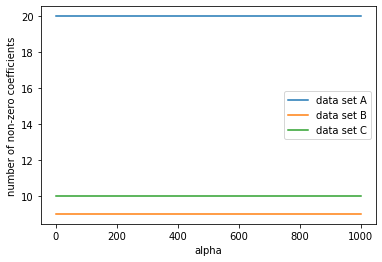

------------------- PART (B)---------------------------
The value of alpha that minimizes the number of non-zero coefficients in data set A is:
1
The value of alpha that minimizes the number of non-zero coefficients in data set B is:
1
The value of alpha that minimizes the number of non-zero coefficients in data set C is:
1
------------------- PART (C)---------------------------


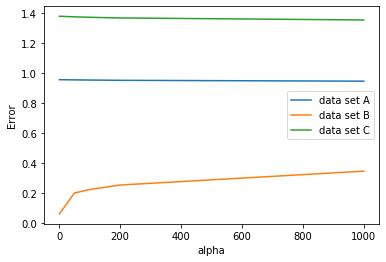

------------------- PART (D)---------------------------
The lambda that minimizes the mean squared error of data set A is:
1000
The lambda that minimizes the mean squared error of data set B is:
1
The lambda that minimizes the mean squared error of data set C is:
1000
------------------- PART (E)---------------------------
try lambda = 100000: 
number of non-zero coefficients for lambda = 100000: 
20
try lambda = 1000000: 
number of non-zero coefficients for lambda = 1000000: 
20
try lambda = 10000000: 
number of non-zero coefficients for lambda = 10000000: 
20
It does not appear that there is any lambda that will allow all of the coefficients in the model for Dataset A to go to zero
---------------------------------------------------------
I'm using this section to have some convient print outs for question 3:
wb for dataset A:
for Lasso:
[-0.  0.  0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0.  0. -0.  0. -0.
 -0. -0.]
for Ridge:
[-5.88753218e-03  2.59671637e-02  2.03837540e-02 -1.49

In [4]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

class Ridge:
    def __init__(self, gamma, data):
        self.gamma = gamma
        self.data = data
        
        
    def fit(self):
        '''
        Here you must fit a Lasso model, train it using the data you have in self.data, 
        specifically the training part, for the specified value of gamma in self.gamma. 
        Calculate the number of non-zero coefficients in the model weights. Then,
        test the trained model on the testing part of the data in self.data and calculate the
        Root mean square error between the predicted values and the actual values of target variable.
        
        RETURN : 
            num_nonzero_coeff : number of non-zero coefficients in the model weights
            mean_squared_err : Root mean square error between the predicted values and the 
            actual values of target variable
        '''
        model = linear_model.Ridge(alpha = self.gamma)
        model.fit(self.data.train_x, self.data.train_y)
        num_nonzero_coeff = 0
        for i in model.coef_:
            if(i != 0):
                num_nonzero_coeff += 1
        predictedY = model.predict(self.data.test_x)
        mean_squared_err = np.sqrt(mean_squared_error(self.data.test_y, predictedY))
        self.model = model
        return(num_nonzero_coeff, mean_squared_err)


alphas = [1, 50, 100, 200, 1000]
print('------------------- PART (A)---------------------------')

for i in data_sets.keys():
    numberNonZer = []
    for j in alphas:
        RidgeModel = Ridge(j, data_sets[i])
        numberNonZer.append(RidgeModel.fit()[0])
    print("Lambda Value:")
    print(alphas)
    print("Number of non-zero coefficients for data set " + i)
    print(numberNonZer)
    plt.plot(alphas,numberNonZer, label = "data set " + i)
plt.xlabel("alpha")
plt.ylabel("number of non-zero coefficients")
plt.legend()
plt.show()
print('------------------- PART (B)---------------------------')
wbRidge = []
for i in data_sets.keys():
    numberNonZer = []
    for j in alphas:
        RidgeModel = Ridge(j, data_sets[i])
        numberNonZer.append(RidgeModel.fit()[0])
    print("The value of alpha that minimizes the number of non-zero coefficients in data set " + i + " is:")
    print(alphas[numberNonZer.index(min(numberNonZer))])
    RidgeModel = Ridge(j, data_sets[i])
    temp = RidgeModel.fit()
    wbRidge.append(RidgeModel.model.coef_)
        
print('------------------- PART (C)---------------------------')
for i in data_sets.keys():
    error = []
    for j in alphas:
        RidgeModel = Ridge(j, data_sets[i])
        error.append(RidgeModel.fit()[1])
    plt.plot(alphas, error, label = "data set " + i)
plt.xlabel("alpha")
plt.ylabel("Error")
plt.legend()
plt.show()
print('------------------- PART (D)---------------------------')
wdRidge = []
for i in data_sets.keys():
    error = []
    for j in alphas:
        RidgeModel = Ridge(j, data_sets[i])
        error.append(RidgeModel.fit()[1])
    print("The lambda that minimizes the mean squared error of data set " + i + " is:")
    print(alphas[error.index(min(error))])
    RidgeModel = Ridge(alphas[error.index(min(error))], data_sets[i])
    temp = RidgeModel.fit()
    wdRidge.append(RidgeModel.model.coef_)
print('------------------- PART (E)---------------------------')
print("try lambda = 100000: ")
RidgeModel = Ridge(100000, data_sets["A"])
print("number of non-zero coefficients for lambda = 100000: ")
print(RidgeModel.fit()[0])
print("try lambda = 1000000: ")
RidgeModel = Ridge(1000000, data_sets["A"])
print("number of non-zero coefficients for lambda = 1000000: ")
print(RidgeModel.fit()[0])
print("try lambda = 10000000: ")
RidgeModel = Ridge(10000000, data_sets["A"])
print("number of non-zero coefficients for lambda = 10000000: ")
print(RidgeModel.fit()[0])
print("It does not appear that there is any lambda that will allow all of the coefficients in the model for" +
     " Dataset A to go to zero")
print('---------------------------------------------------------')
print("I'm using this section to have some convient print outs for question 3:")
print("wb for dataset A:")
print("for Lasso:")
print(wbLasso[0])
print("for Ridge:")
print(wdRidge[0])
print("wd for dataset A:")
print("for Lasso:")
print(wdLasso[0])
print("for Ridge:")
print(wdRidge[0])
print("-----")
print("wb for dataset B:")
print("for Lasso:")
print(wbLasso[1])
print("for Ridge:")
print(wdRidge[1])
print("wd for dataset B:")
print("for Lasso:")
print(wdLasso[1])
print("for Ridge:")
print(wdRidge[1])
print("----------")
print("wb for dataset C:")
print("for Lasso:")
print(wbLasso[2])
print("for Ridge:")
print(wdRidge[2])
print("wd for dataset C:")
print("for Lasso:")
print(wdLasso[2])
print("for Ridge:")
print(wdRidge[2])

3. [10 pts] Compare the two algorithms on each data set: compare the number of non-zero coordinates of the $\mathbf w_d$'s, and compare the test error rates of the $\mathbf w_b$'s. Report your results and comment on them.

It appears that $w_b$ for lasso always has more zeros than $w_b$ for ridge, though Ridge regression does get close to zero for many of its weights. It also appears that $w_b$ is not the same as $w_d$ in some cases. For instance: the $w_b$ in the Lasso of dataset A is a vector of all zeros, where as the $w_d$ has non-zero terms. The difference in error between the two methods doesn't appear to be that great, though we can again observe that ridge regression gives no non-zero terms in its $w_d$ and Lasso does give non-zero terms in $w_d$.  
<br/>
Specifically, for data set A we see that Lasso will eventually get only 0s for its coefficents, and Ridge will get close to zero for most of its coefficients (but never reach 0), and these are also the same coefficients that minimize the errors ($w_b = w_d$). For this data set we get similar accuracyies for both methods.  
For data set B we never get only zero coefficients for any of the alphas we used in lasso, and Ridge gives no zero coefficients (as we would expect). $w_b$ does not equal $w_d$ for this data set, and ridge and lasso both gave similar accuracies.  
For data set C we also never reach the point of only having 0s for coefficients with lasso, but we do get more 0s than with B. Ridge still gives no non-zero coefficients, and our accuracies were still similar across the two methods.

## Part 2: Visualizing Data and Decision Boundaries for different kernels - 20 points

We've also been exploring the world of support vector machines and Kernels, so to understand these systems a little better, let's start by building a few ourselves.

### A. Training SVM with Linear Kernel (Dataset 1)

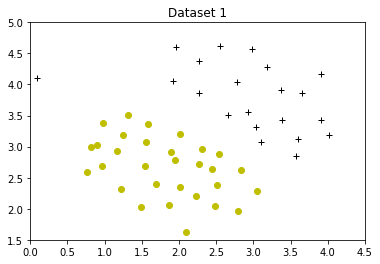

In [5]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

from plot_data import plot_data


# Load from data1
mat_data = sio.loadmat('./data/data1.mat')
X = mat_data['X']
y = mat_data['y'].ravel()

# Plot training data
plt.figure()
plot_data(X, y)
plt.xlim([0, 4.5])
plt.ylim([1.5, 5])
plt.title("Dataset 1")
plt.show()

**A:** [10 pts] In `data1.mat`, most of the positive and negative examples can be separated by a single line. We'll train an SVM with a linear kernel (look at `sklearn.svm.LinearSVC`) with C = 1 and plot the decision boundary using `visualize_boundary_linear(X, y, clf)`. `clf` is the SVM classifier. For the classifier, you should use the scikit-learn implementation. Add the decision boundary, uncomment the visualization, and verify it in the graph below.

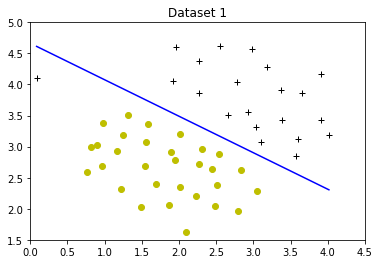

In [6]:
# SOLUTION 
from sklearn import svm
from visualize_boundary_linear import visualize_boundary_linear

### START CODE HERE ### (approx. 3 lines)
C = 1
clf = svm.LinearSVC(C = C)
clf.fit(X,y)
### END CODE HERE ### 


plt.figure()
visualize_boundary_linear(X, y, clf)
plt.xlim([0, 4.5])
plt.ylim([1.5, 5])
plt.title("Dataset 1")
plt.show()

### B. Training SVM with RBF Kernel (Dataset 2)

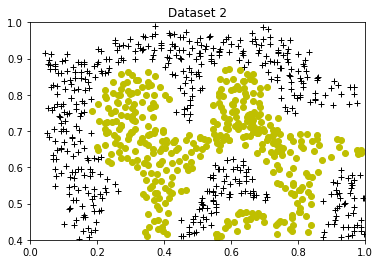

In [7]:
# Load from data2
mat_data = sio.loadmat('./data/data2.mat')
X = mat_data['X']
y = mat_data['y'].ravel()

# Plot training data
plt.figure()
plot_data(X, y)
plt.xlim([0, 1])
plt.ylim([0.4, 1])
plt.title("Dataset 2")
plt.show()

**B** [10 pts] In `data2.mat`, the positive and negative data points are not linearly separable. For this dataset, construct an SVM classifier with a Gaussian kernel (look at `sklearn.svm.SVC`) to learn a non-linear decision boundary. You should use the scikit-learn implementation for the same. To plot the decision boundary use `visualize_boundary(X, y, clf)`. As before, implement the decision boundary, uncomment the visualization, and verify it in the graph below.

/home/jat/Documents/GradSchool/machineLearning/visualize_boundary.py:29: UserWarning: No contour levels were found within the data range.
  plt.contour(X1, X2, vals, levels=[0])


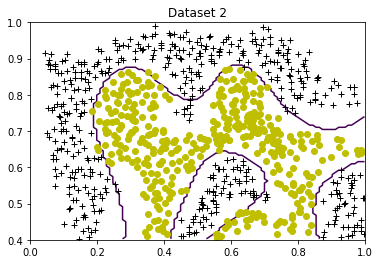

In [8]:
from visualize_boundary import visualize_boundary

# SVM Parameters to be used
C = 100
gamma = 10
kernel = 'rbf'

### START CODE HERE ### (approx. 3 lines)
clf = svm.SVC(C = C, kernel= kernel, gamma = gamma)
clf.fit(X,y)
### END CODE HERE ### 

plt.figure()
visualize_boundary(X, y, clf)
plt.xlim([0, 1])
plt.ylim([0.4, 1])
plt.title("Dataset 2")
plt.show()

## Part 3: Kernel Perceptron - 40 points

Now that we've seen the SKLearn implementation of some different kernels, we'll be working to implement some of our own kernel transformations, but we'll work within the perceptron space. Implement the Kernel Perceptron as described in the lecture using different kernel functions (Linear, Polynomial, and Gaussian RBF). Use the training and test data provided below to train and test your implementation. Report the error rate for each kernel function.

**A:** [20 pts] Implement the kernel functions below:

In [9]:
import numpy as np
from numpy import linalg

def linear_kernel(x1, x2):
    return(np.dot(x1, x2))

def polynomial_kernel(x, y, p = 3):
    return((np.dot(x,y)+1)**p)
    
def gaussian_kernel(x, y, sigma = 0.5):
    return(np.exp(-1*(np.linalg.norm(x-y)**2)/(2*sigma**2)))

In [10]:
import unittest

class TestKernels(unittest.TestCase):
    
    def setUp(self):
        self.x1 = np.array([1, 2, 1])
        self.x2 = np.array([0, 4, -1])
        
    def test0(self):
        """
        WARNING : DO NOT CHANGE THE UNIT TESTS
        Test the linear kernel
        """
        self.assertEqual(linear_kernel(self.x1, self.x2), 7)
    
    def test_polynomial_kernel(self):
        """
        WARNING : DO NOT CHANGE THE UNIT TESTS
        Test the polynomial kernel
        """
        self.assertEqual(polynomial_kernel(self.x1, self.x2), 512)
        
    def test_gaussian_kernel(self):
        """
        WARNING : DO NOT CHANGE THE UNIT TESTS
        Test the gaussian kernel
        """
        self.assertAlmostEqual(gaussian_kernel(self.x1, self.x2) * 10 ** 8, 1.52299, 4)
    

tests = TestKernels()
tests_to_run = unittest.TestLoader().loadTestsFromModule(tests)
unittest.TextTestRunner().run(tests_to_run)
            

...
----------------------------------------------------------------------
Ran 3 tests in 0.109s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

**B:** [20 pts] Implement the following methods of the `KernelPerceptron` class. The `__init__` takes also as input the kernel to use. You are allowed to introduce new class variables/methods.

* Implement the `fit` method. Taking as input the training data, it learns the model parameters
* Implement the `predict` method which takes as input new examples and returns the estimated label 

In [11]:
class KernelPerceptron:
    def __init__(self, kernel = linear_kernel, Niter = 1):
        self.kernel = kernel
        self.Niter = Niter
        self.support_vector_x = None
        self.support_vector_y = None
    def fit(self, X, y):
        '''
        Estimate model parameters i.e the support vectors here and store them in the
        class variable self.support_vector_x and self.support_vector_y
        '''
        #initialize n for convienence:
        n = X.shape[0]
        #Make our alpha, which will record mistakes (increment alpha[i] by 1 if there is a mistake in classifying
        #the ith example):
        alpha = np.zeros(n)
        #train our model, do this Niter times:
        for i in range(0, self.Niter):
            #for each training example
            for j in range(0, n):
                #find our predicted y for the jth training example
                yhat = 0
                #Calculates the sum from the lecture notes
                #NOTE: I tried to get a vectorized implementation to work, but I couldn't quite figue it out, will
                #try again if I have time
                for k in range(0, n):
                    yhat += alpha[k]*y[k]*self.kernel(X[k], X[j])
                #if we predicted wrong increment alpha
                if np.sign(yhat) != y[j]:
                    alpha[j] += 1
        #support vectors are then the vectors where we incremented alpha (so alpha > 0)
        nonZeroInd = alpha > 0
        self.support_vector_x = X[nonZeroInd, :]
        self.support_vector_y = y[nonZeroInd]
        #Need to have access to alpha in order to predict
        self.alpha = alpha[nonZeroInd]
        
    def predict(self, X):
        '''
        Here X is a set of points. 
        RETURN : 
            y_predict : predicted labels for a set of points X
        '''
        #Initialize n for convience
        n = X.shape[0]
        #initialize a vector of prediciton (1 for each testing example)
        y_predict = np.zeros(n)
        #for each testing example
        for i in range(0, n):
            #predict y
            yhat = 0
            #see sum from lecture notes (again tried to get this to work as a vectorized operation, but I couldn't
            #get the dimensions to work out)
            for j in range(0, len(self.alpha)):
                yhat += self.alpha[j]*self.support_vector_y[j]*self.kernel(self.support_vector_x[j,:], X[i,:])
            #if the sign if > 0 predict the positive case
            #if less than or equal to 0 predict negative case
            if np.sign(yhat) > 0:
                y_predict[i] = 1
            elif np.sign(yhat) <= 0:
                y_predict[i] = -1
        return(y_predict)

##  Solving a new classification problem using SVM

We are using the IRIS Dataset for this classification task. We have created a binary classification problem to determine whether a given flower is a setosa or not. To create this, we pre-processed the labels to create a label vector where setosa’s label is unchanged (i.e. its label is 1), but both versicolor and virginica are now labeled as -1. The data contains two out of the four attributes, petal width and petal length.We are going to use this dataset to test our Kernel Perceptron
<br>

<img src="wide_iris.png" alt="Drawing" style="width: 600px;"/>

<br>

In [12]:
from scipy.io import loadmat
class Data:
    def __init__(self):
        ff = lambda x,y : loadmat(x)[y]
        
        self.X_train = ff("data/iris_3/train_data.mat", "train_data")
        self.y_train = ff("data/iris_3/train_labels.mat", "train_labels").flatten()
        
        self.X_test = ff("data/iris_3/test_data.mat", "test_data")
        self.y_test = ff("data/iris_3/test_labels.mat", "test_labels").flatten()
        
data = Data()
data.X_train.shape

(135, 2)

**C:** Report the test error as a percentage for each kernel function for `Niter = 20`

In [13]:
from sklearn.metrics import accuracy_score

test = KernelPerceptron(linear_kernel, 20)
test.fit(data.X_train, data.y_train)
print("Error percentage for a linear kernel")
print((1 - accuracy_score(data.y_test, test.predict(data.X_test)))*100)
print("Error percentage for a polynomial kernel")
test = KernelPerceptron(polynomial_kernel, 20)
test.fit(data.X_train, data.y_train)
print((1 - accuracy_score(data.y_test, test.predict(data.X_test)))*100)
print("Error percentage for a Gaussian kernel")
test = KernelPerceptron(gaussian_kernel, 20)
test.fit(data.X_train, data.y_train)
print((1 - accuracy_score(data.y_test, test.predict(data.X_test)))*100)

Error percentage for a linear kernel
40.0
Error percentage for a polynomial kernel
6.666666666666665
Error percentage for a Gaussian kernel
6.666666666666665


**Expected Output**: 

<table> 
    <tr>
    <td>
    **Linear Kernel**
    </td>
     <td>
    40 %
    </td>
    </tr>
      <tr>
    <td>
    **Polynomial Kernel**
    </td>
     <td>
    6.67 %
    </td>
    </tr>
      <tr>
    <td>
    **Gaussian Kernel**
    </td>
     <td>
    6.67 %
    </td>
    </tr>

</table> 